In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.linalg import svd, orth, qr
from scipy.optimize import curve_fit
from numpy import sin, cos, pi
cmap = plt.cm.plasma

In [2]:
from initial_conditions import Domain, Polynom_Cm1, Polynom_C0, Polynom_C1, Polynom_C2, Polynom_C3, Polynom_C4, Polynom_C5
from basis_functions import SVD, Trigonometric, Trigonometric2, TrigonometricOdd, Greedy, LNA, LPF, Sinc, Fourier

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
page_width_pt = 455.24
pt2in = 0.01389 
pt2cm = 0.0352777778
cm2in = 1/2.54
plot_width_in = page_width_pt*pt2in/2
print(plot_width_in/cm2in)

fs = 10
fs_lbl = 6
plt.rcParams["figure.figsize"] = (plot_width_in, plot_width_in/1.61803398875)
plt.rcParams["figure.autolayout"] = True
plt.rcParams['font.size'] = fs
plt.rcParams['axes.titlesize'] = fs
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['legend.labelspacing'] = 0.0
plt.rcParams['legend.fontsize'] = fs_lbl
plt.rcParams['legend.handlelength'] = 1.0

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=12, serif='Computer Modern Roman')
pth = "../Plots/"

8.030570172000001


In [4]:
VALIDATE = False  # includes SVD + numerical error computation

In [5]:
m, n, r = 2500, 2500, 2500
#m, n, r = 1000, 1000, 1000
x = Domain([0, 1], m)
mu = Domain([0, 1], n)

In [6]:
results = np.zeros((6, 9, 4, r))
epsilon = 0.025
u_m1 = Polynom_Cm1()
u_0 = Polynom_C0()
u_1 = Polynom_C1()
u_2 = Polynom_C2()
u_3 = Polynom_C3()
u_4 = Polynom_C4()
u_5 = Polynom_C5()
initc = [u_m1, u_0, u_1, u_2, u_3, u_4, u_5]

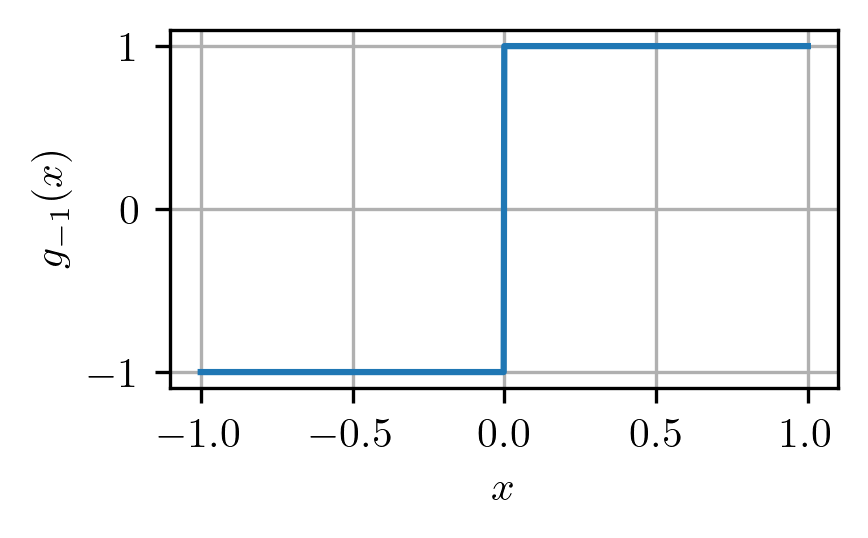

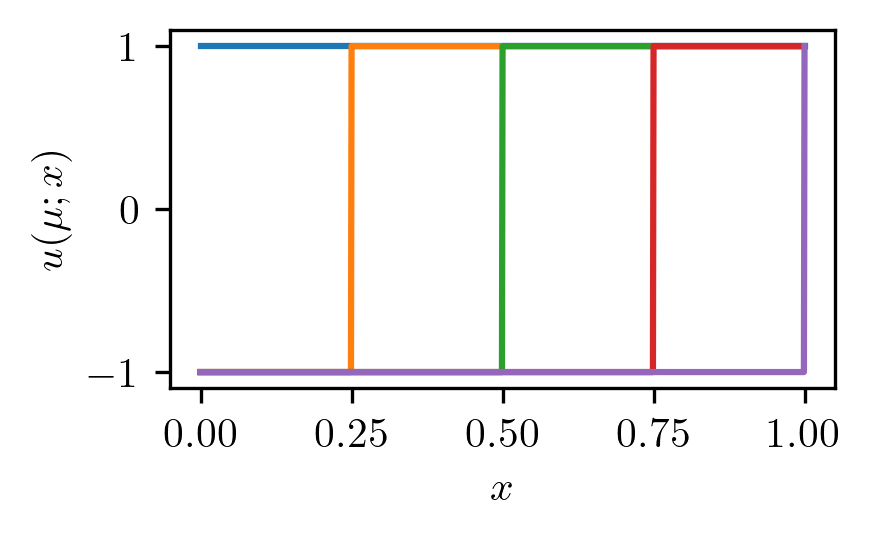

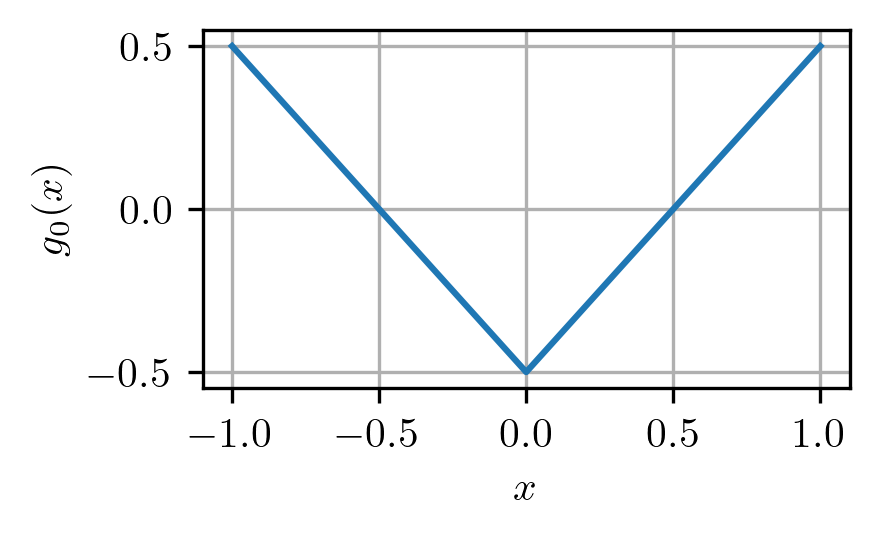

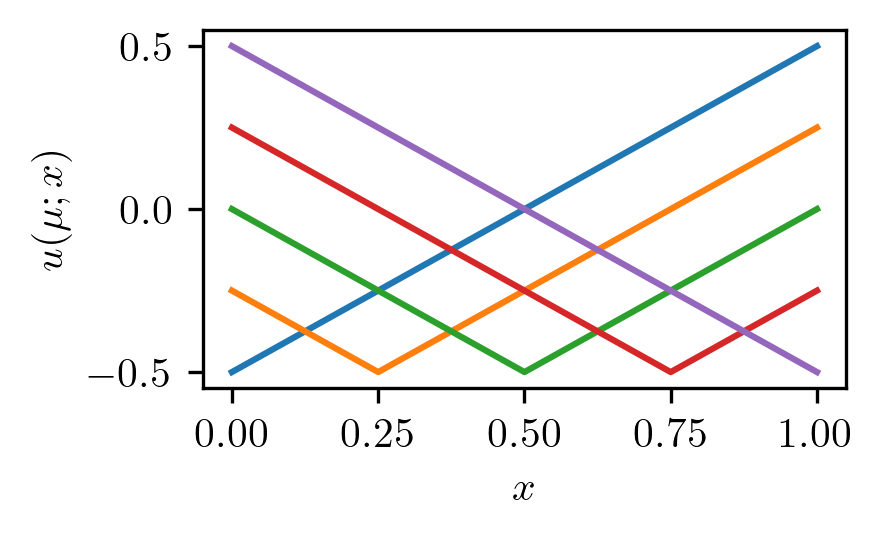

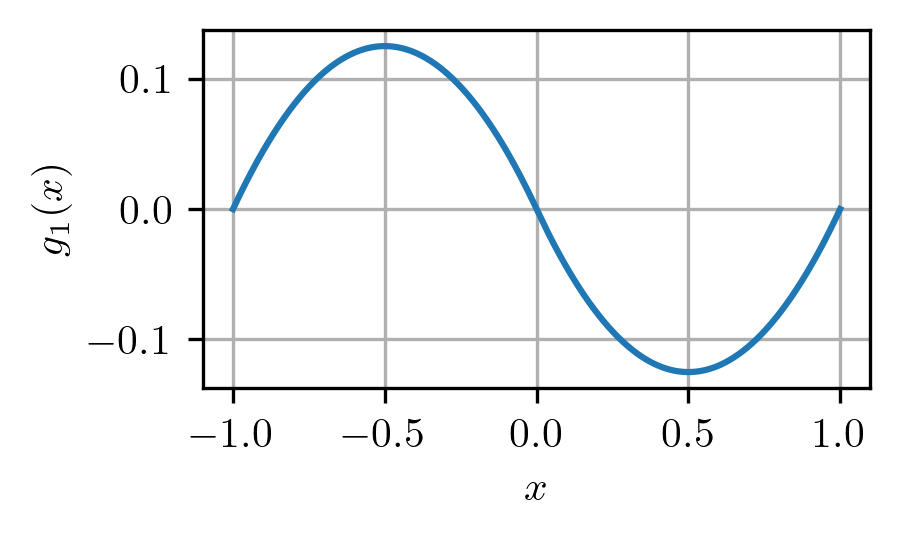

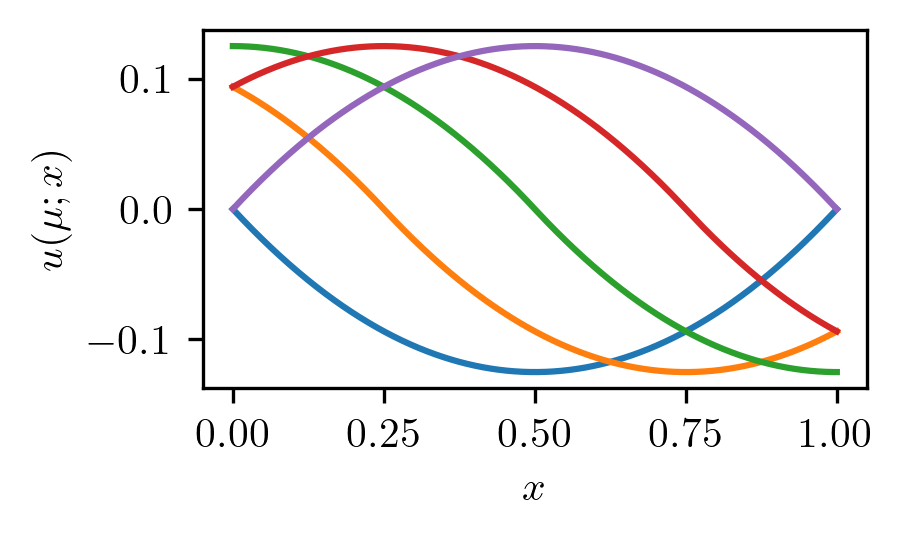

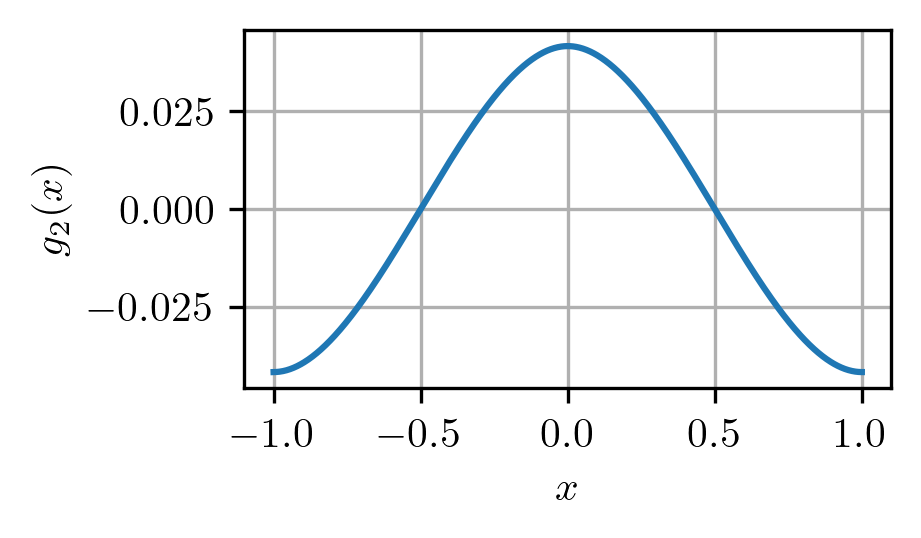

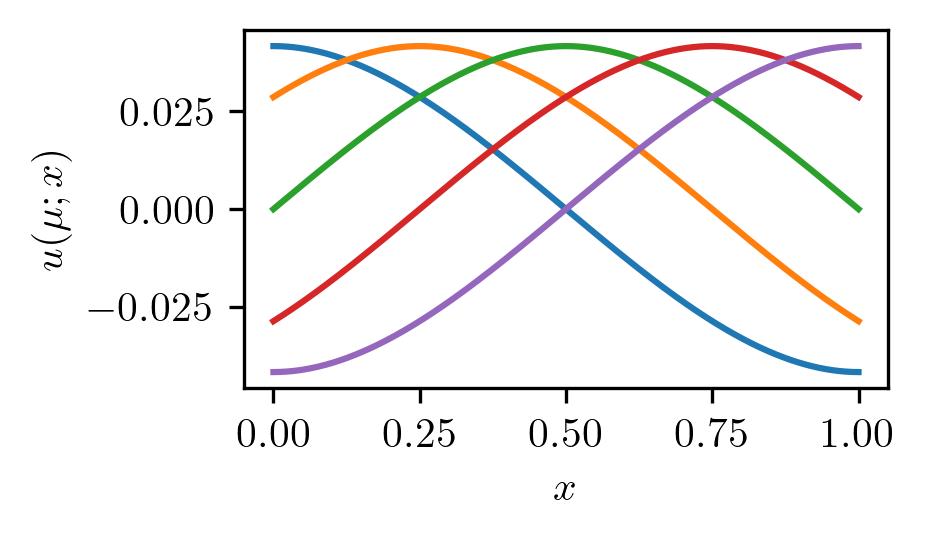

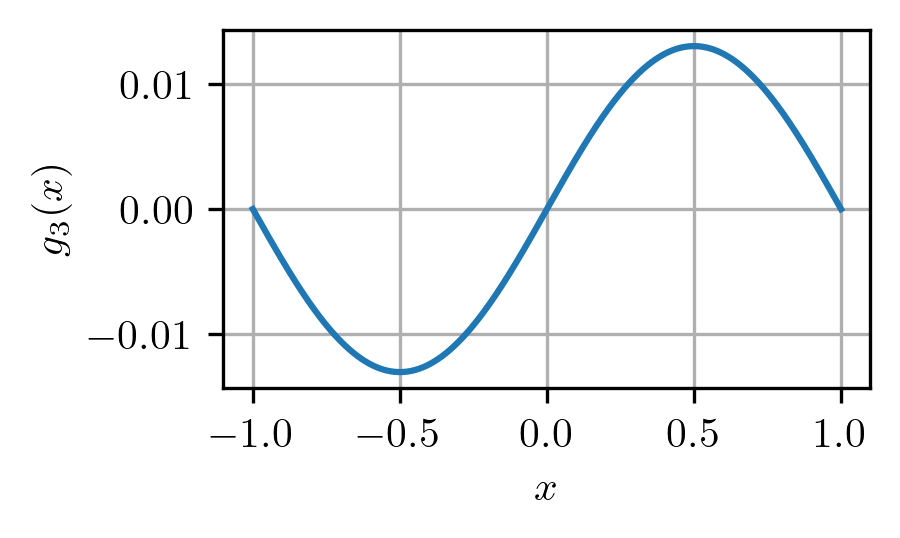

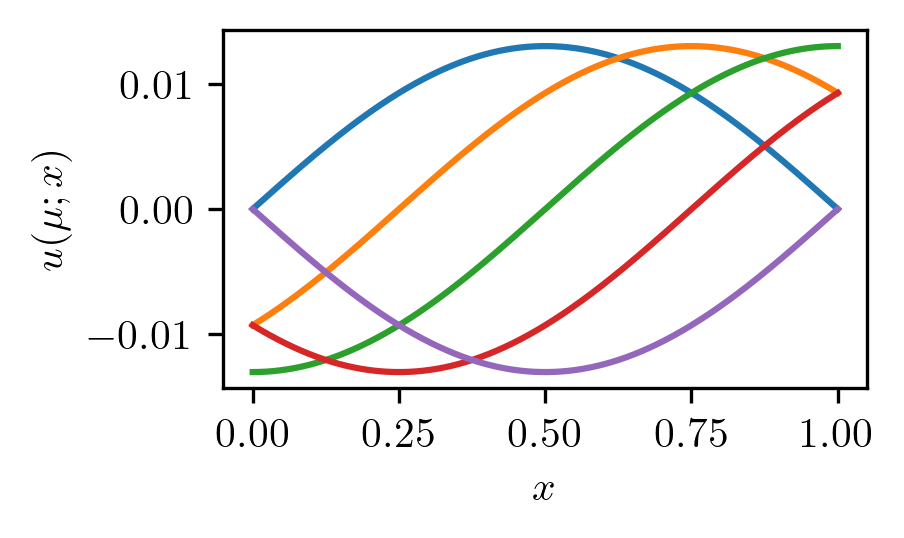

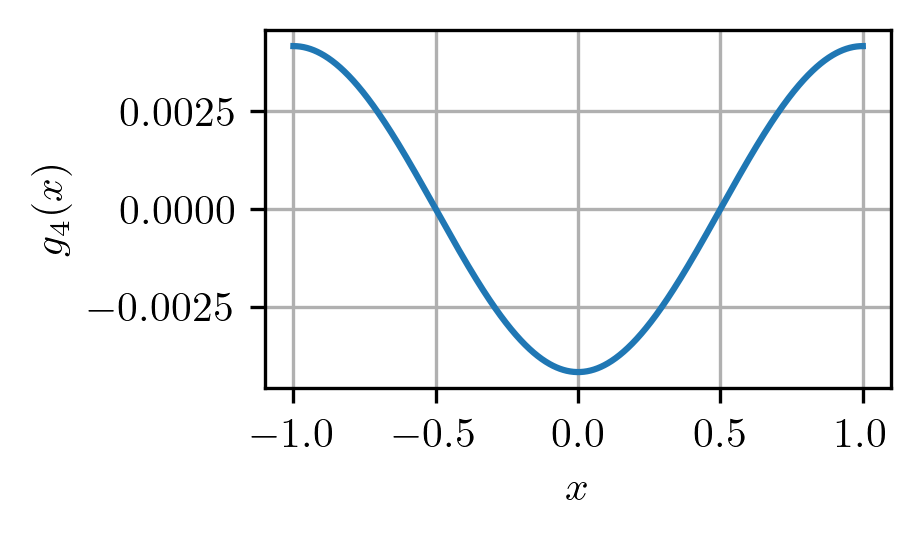

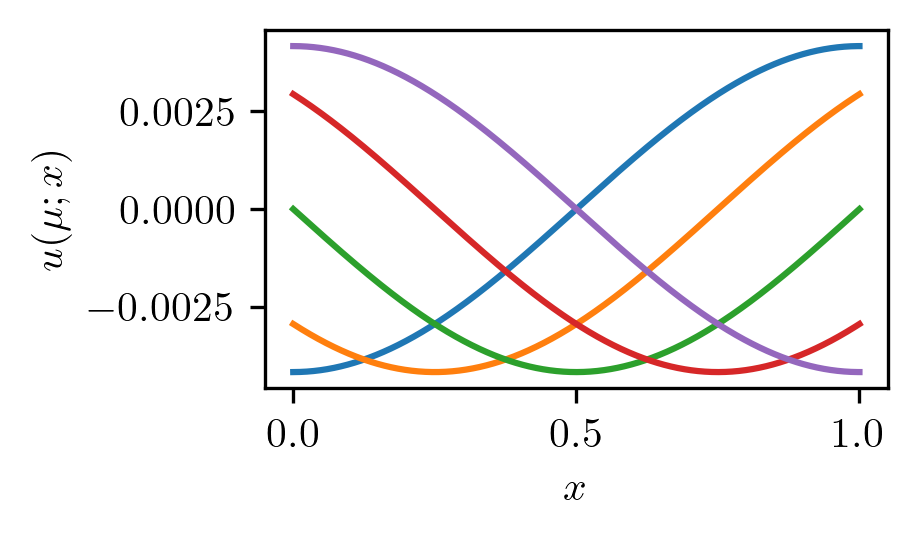

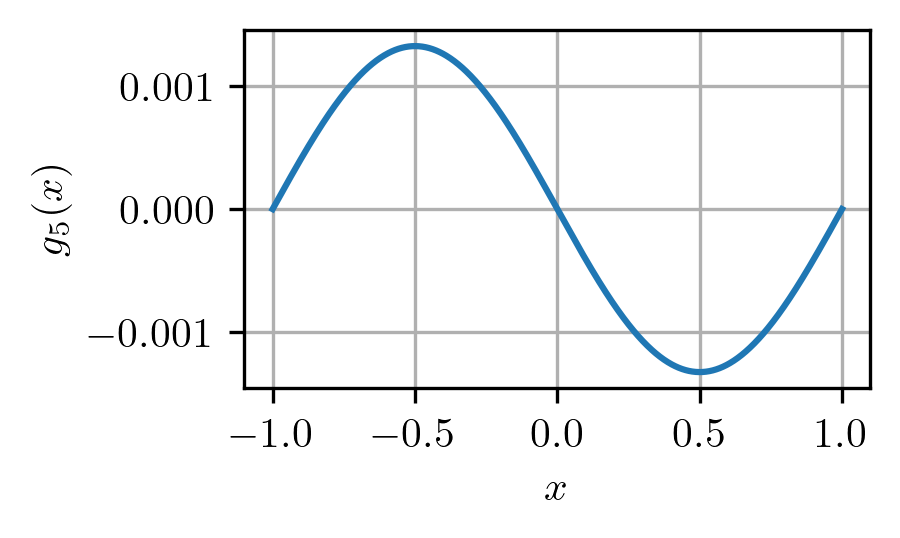

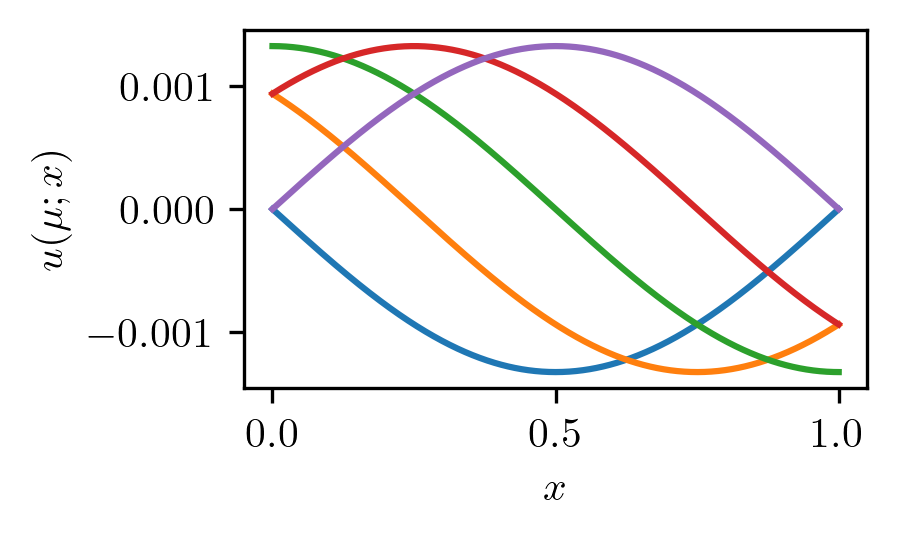

In [7]:
u_k = u_1
for u_k in initc:
    u_k.plot_q()
    fig, ax = plt.subplots()
    for mu_j in [0.0, 0.25, 0.5, 0.75, 1.0]:
        u_k.plot_u(mu_j, ax=ax, label=r'$u(\mu={:.2f}; x)$'.format(mu_j))
    plt.grid()
    plt.show()

#X = u_k(x(), mu())
#plt.imshow(X)
#np.save("C:/Users/florianma/OneDrive - Institutt for Energiteknikk/Documents/Repositories_local/test_scripts/X_test.npy", X)

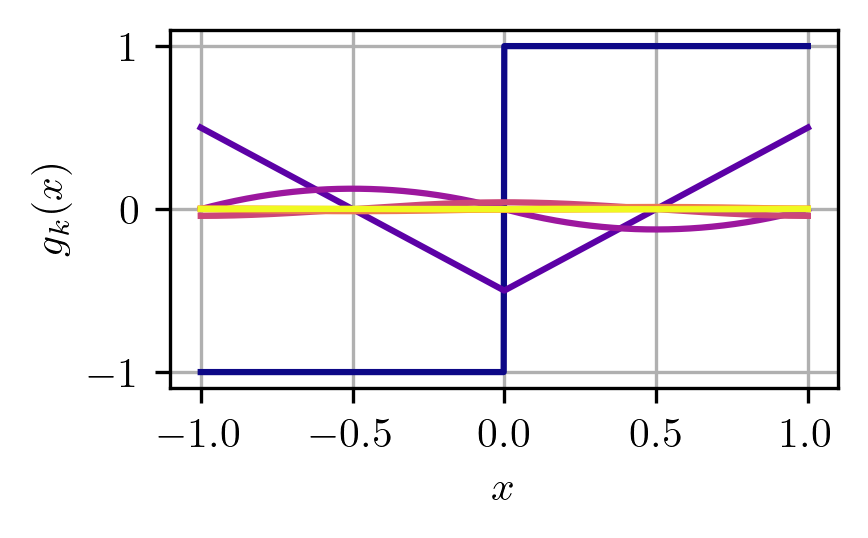

In [18]:
fig, ax = plt.subplots()
for j, u_k in enumerate(initc):
    color = cmap(j/6)
    u_k.plot_q(ax=ax, label=r'$u(\mu={:.2f}; x)$'.format(mu_j), color=color)
ax.set_ylabel("$g_k(x)$")
plt.show()

In [9]:
def sort_trig_basis(trig_basis_odd, X, PLOT=True):
    V_k = trig_basis_odd.U.reshape(m, -1, 2)  # x, r, 2
    V_1 = V_k[:, :, 0].copy()  # sin
    c = V_1.T @ X  # V_1.T @ X is slow!
    c_n = (c**2).sum(axis=1)
    order = np.argsort(-c_n)
    if PLOT:
        V_1 = V_k[:, :, 1].copy()  # sin
        c2 = V_1.T @ X  # V_1.T @ X is slow!
        c_n2 = (c**2).sum(axis=1)
        fig, ax = plt.subplots()
        ax.plot(trig_basis_odd.frequencies, c_n**.5, ".", ms=1)
        ax.plot(trig_basis_odd.frequencies, c_n2**.5, ".", ms=1)
        ax.set_yscale('log')
        plt.show()
    trig_basis_odd.U = V_k[:, order, :].reshape(m, -1)
    trig_basis_odd.frequencies = trig_basis_odd.frequencies[order]
    print("sorted.")
    return None

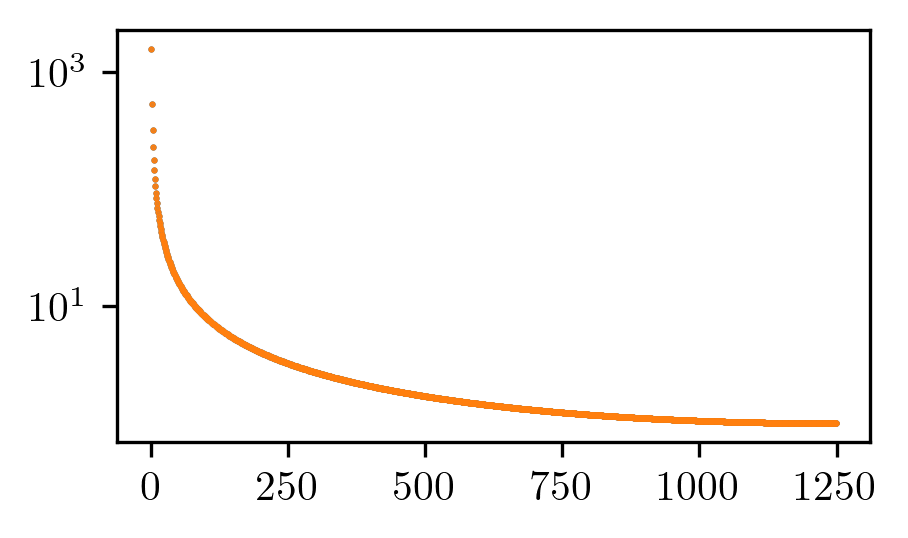

sorted.


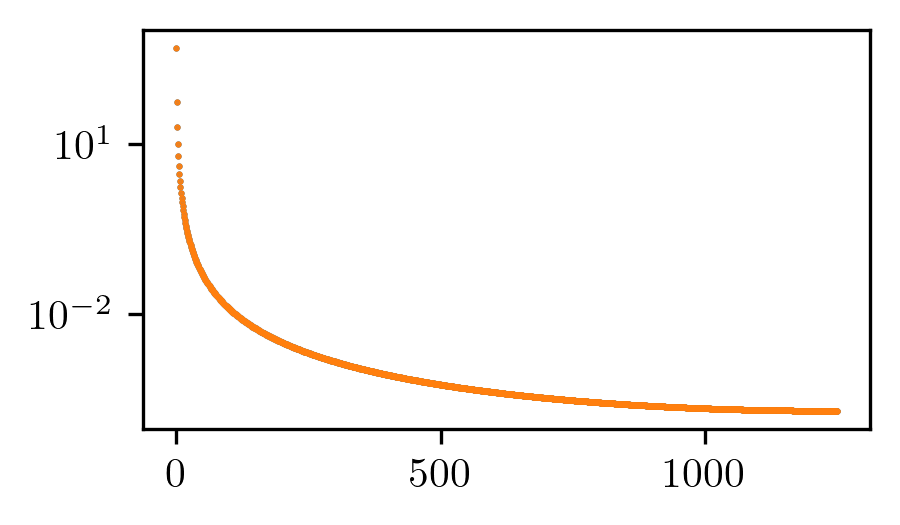

sorted.


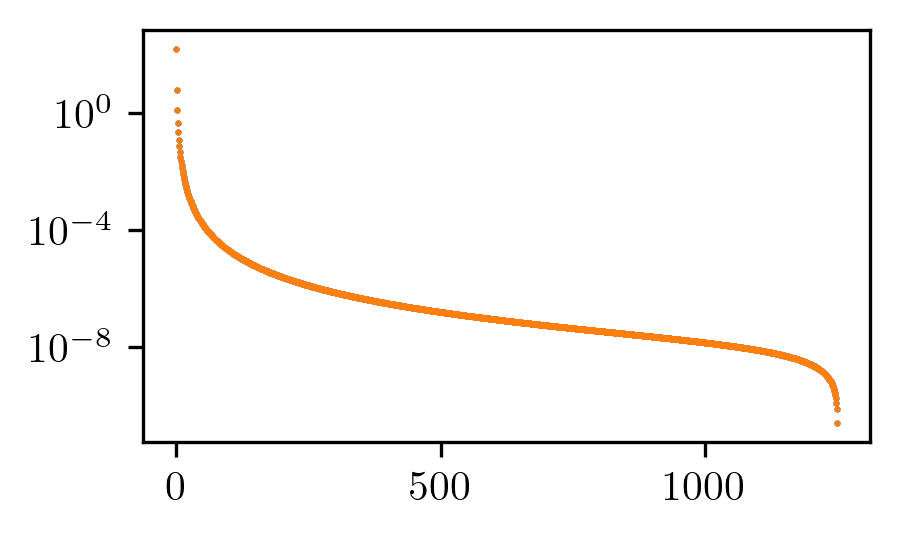

sorted.


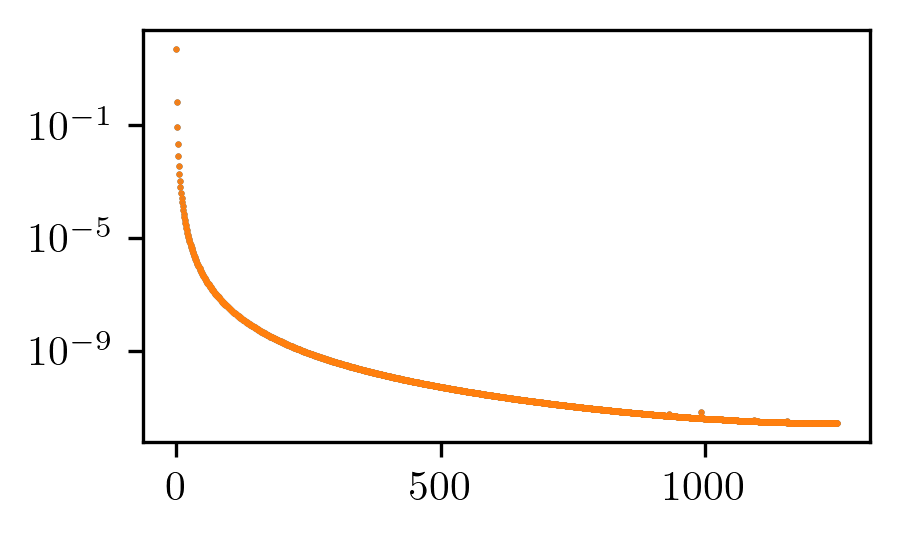

sorted.


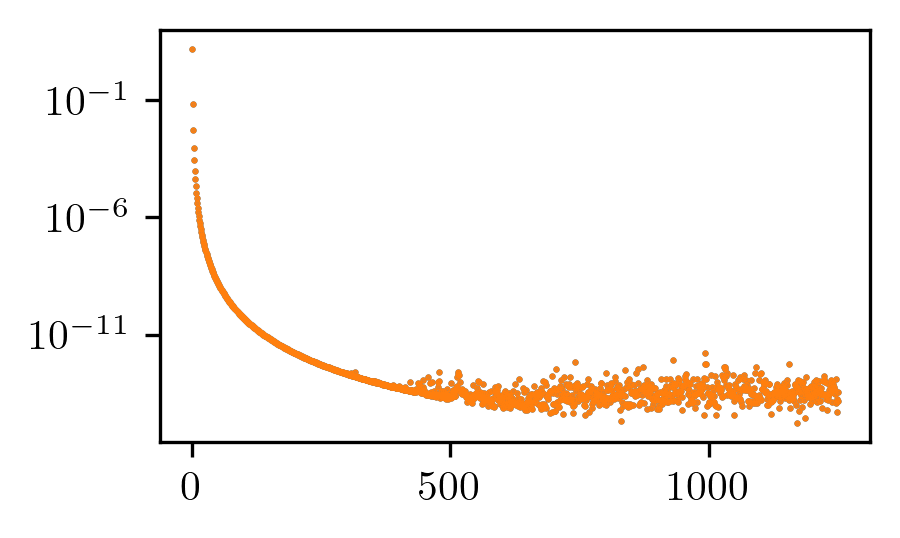

sorted.


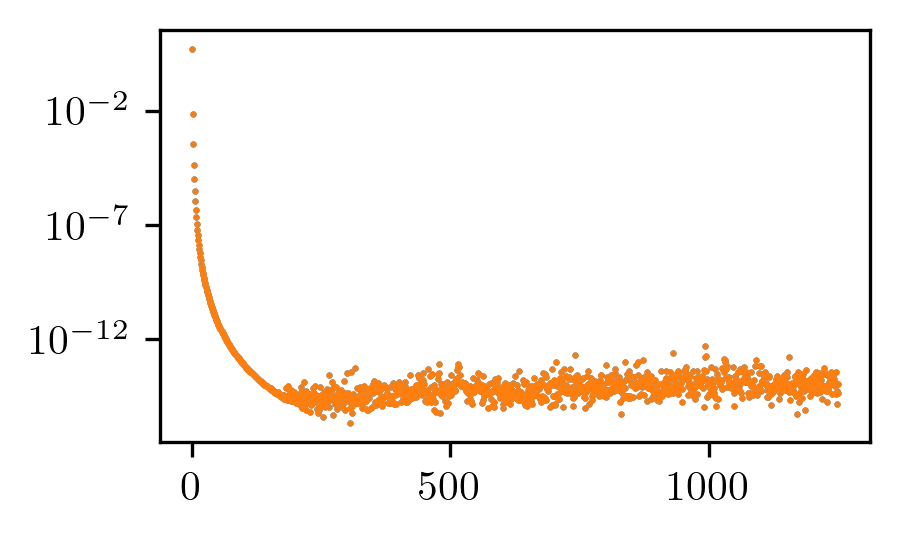

sorted.


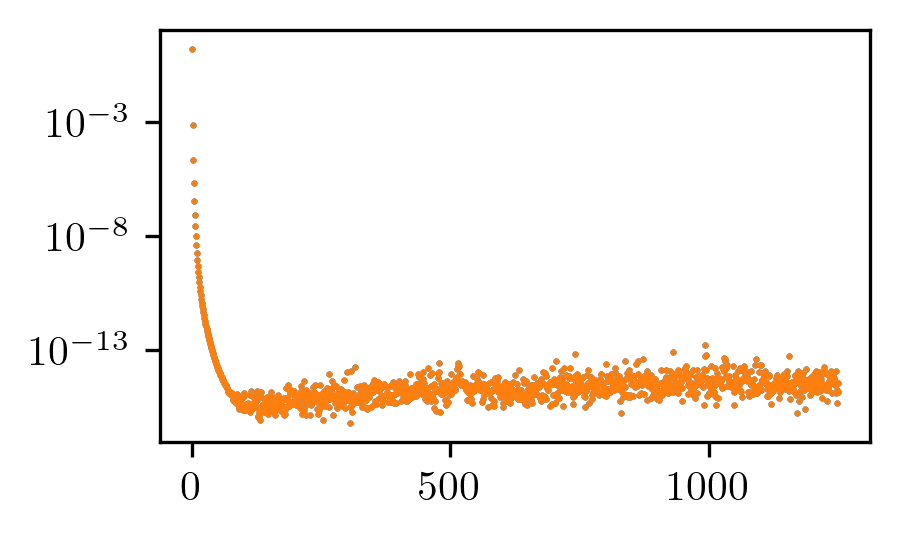

sorted.


In [10]:
trig_basis_odd = TrigonometricOdd(x())
delta_Ns = np.zeros((len(initc), r))
if VALIDATE:
    d_Ns = np.zeros((len(initc), r))
    delta_Ns2 = np.zeros((len(initc), r))
for j, u_k in enumerate(initc):  # 9
    X = u_k(x(), mu())
    sort_trig_basis(trig_basis_odd, X)

    delta_N, S = trig_basis_odd.calc_error_analytic(X)
    delta_Ns[j] = delta_N
    if VALIDATE:
        svd_basis = SVD(X)  # slow
        delta_n2, d_N = svd_basis.calc_error(X)  # very slow
        delta_Ns2[j] = delta_n2
        d_Ns[j] = d_N

        #fig, ax = plt.subplots()
        #plt.plot(S2-S, "k.", ms=1)
        #ax.set_yscale('log')
        #plt.show()

In [11]:
def L2(y, n):
    dy = np.diff(y.ravel(), n=n) * len(y)**n
    return np.mean(dy**2)**.5

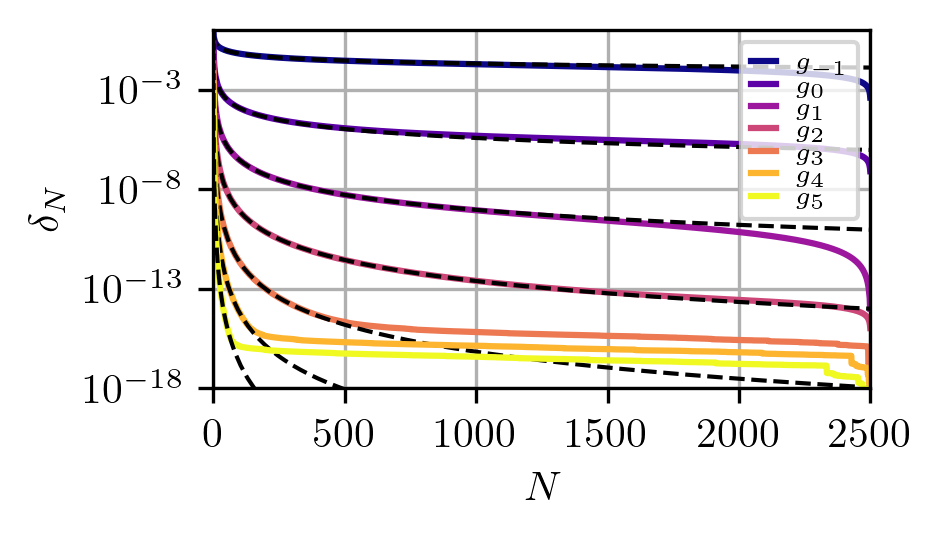

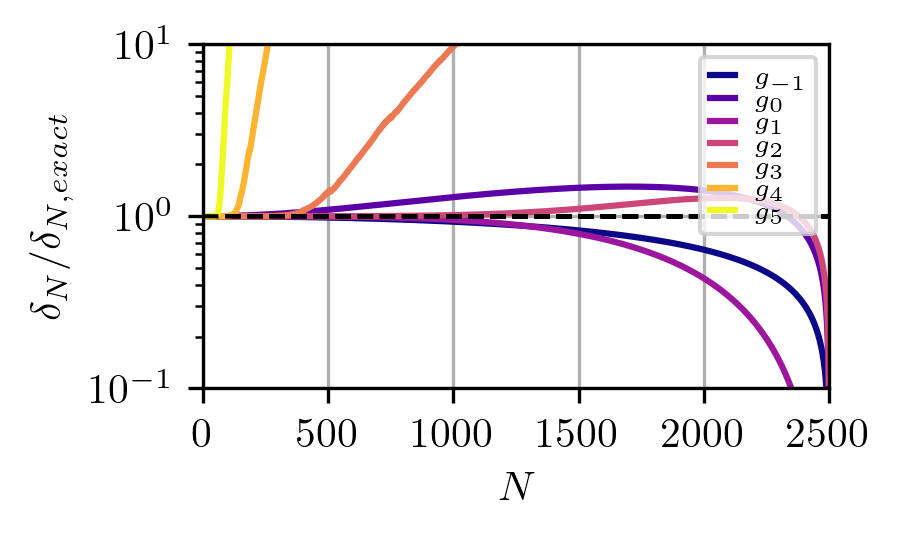

In [12]:
N = np.arange(1, r+1)
Ninf = np.arange(1, 1000000, dtype=np.float64)
fig, ax = plt.subplots(tight_layout=True)
fig2, ax2 = plt.subplots(tight_layout=True)
for j, u_k in enumerate(initc):  # 9
    color = cmap(j/6)
    ax.plot(N[:-1], delta_Ns[j][1:], "-", color=color, ms=1, label=u_k.name)
    if VALIDATE:
        ax.plot(N, delta_Ns2[j], ".", color="g", ms=2)
        ax.plot(N, d_Ns[j], ".", color="r", ms=2)

    k = j-1
    y = u_k.q(np.linspace(-1, 1, 1000))
    f_L2 = L2(y, k+1)
    d_exact = np.cumsum((4*(1/((2*np.floor((Ninf+1)/2)-1)*np.pi))**(2*k+4))[::-1])[::-1][N]**.5
    d_upper = f_L2 * 2*(2*k+3)**.5 / np.pi**(k+2) * N**(-(k+1.5)) # Theorem 6.2 upper bound
    d_lower = 2/(2*k+3)**.5 / np.pi**(k+2) * (N+1)**(-(k+1.5)) # Theorem 6.2 lower bound
        
    model = d_exact

    ax2.plot(N[:-1], delta_Ns[j][1:]/model[:-1], color=color, label=u_k.name)  # TODO
    ax2.plot(N, np.ones_like(N), "k--", lw=1)
    ax.plot(N, model, "k--", lw=1, ms=0)
    #ax.plot(N, model, "--", color=color, ms=0)
    #print("{:.2E}".format(C_estimated))
ax.set_yscale('log')
#plt.title(u_k.name)
ax.legend(loc="upper right")
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$\delta_N$')
ax.set_xlim([0, r])
ax.set_ylim([1e-18, 1e0])

ax2.legend()
ax2.set_yscale('log')
ax2.set_xlim([0, r])
ax2.set_ylim([0.9, 1.1])
ax2.set_ylim([0.1, 10])
ax2.set_xlabel(r'$N$')
ax2.set_ylabel(r'$\delta_N / \delta_{N, exact}$')

ax.grid()
ax2.grid()

fig.savefig(pth+"exact_d_N.pdf")
fig2.savefig(pth+"exact_approx_ratio.pdf")
plt.show()

old stuff

In [15]:
initc = [u_m1, u_0, u_1, u_2, u_3, u_4, u_5]
results = np.zeros((3, 3, 7, r))  # 2 errors, 3 bv, 7 ic, r entries

for j, u_k in enumerate(initc):
    print(u_k.name)
    X = u_k(x(), mu())
    d_N, S = trig_basis_odd.calc_error_analytic(X)
    results[0, 0, j, :] = d_N[:r]
    if VALIDATE:
        svd_basis = SVD(X)

        # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # 
        u_k.plot_q()
        fig, ax = plt.subplots()
        for mu_j in [0.0, 0.25, 0.5, 0.75, 1.0]:
            u_k.plot_u(mu_j, ax=ax, label=r'$u(\mu={:.2f}; x)$'.format(mu_j))
        plt.legend(prop={'size': 8})
        plt.show()
        # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # 

        basis_all = [trig_basis_odd, svd_basis, fourier_basis]
        for i, basis in enumerate(basis_all):
            print(basis.name)
            d_N, S = basis.calc_error_analytic(X)
            results[0, i, j, :] = d_N[:r]
            delta_n, d_n = basis.calc_error(X, r)
            results[1, i, j, :] = d_ndelta_n
            results[2, i, j, :] = delta_n

        # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # 
        fig, ax = plt.subplots()
        for i, basis in enumerate(basis_all):
            ax.plot(results[0, i, j, :], ".", ms=1, label=basis.name)
            ax.plot(results[2, i, j, :], "k--", label=basis.name)
        ax.set_yscale('log')
        plt.legend(prop={'size': 8})
        plt.show()

        # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # - # 

$g_{-1}$
$g_0$
$g_1$
$g_2$
$g_3$
$g_4$
$g_5$


C:\Users\florianma\AppData\Local\Temp\ipykernel_39964\146182277.py:8: RuntimeWarning: divide by zero encountered in power
  d_upper = f_L2 * 2*(2*k+3)**.5 / np.pi**(k+2) * N**(-(k+1.5)) # Theorem 6.2 upper bound


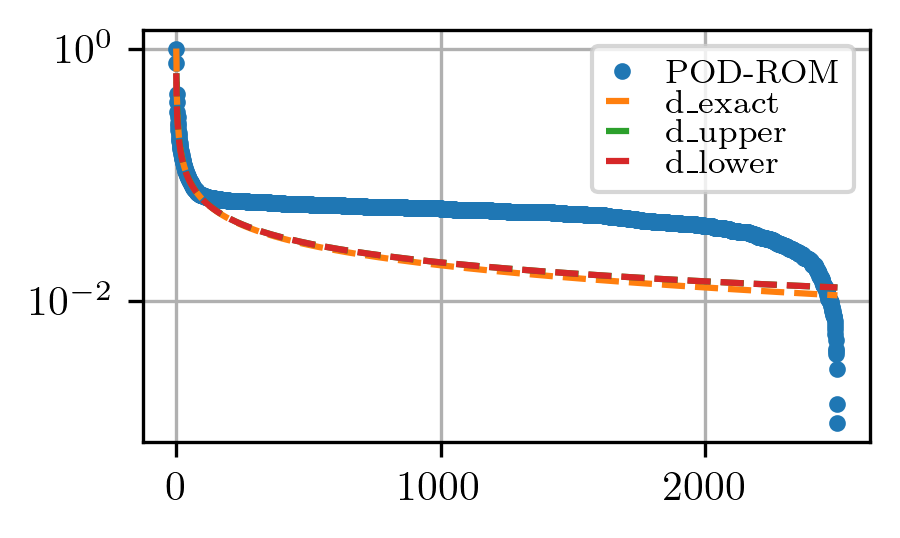

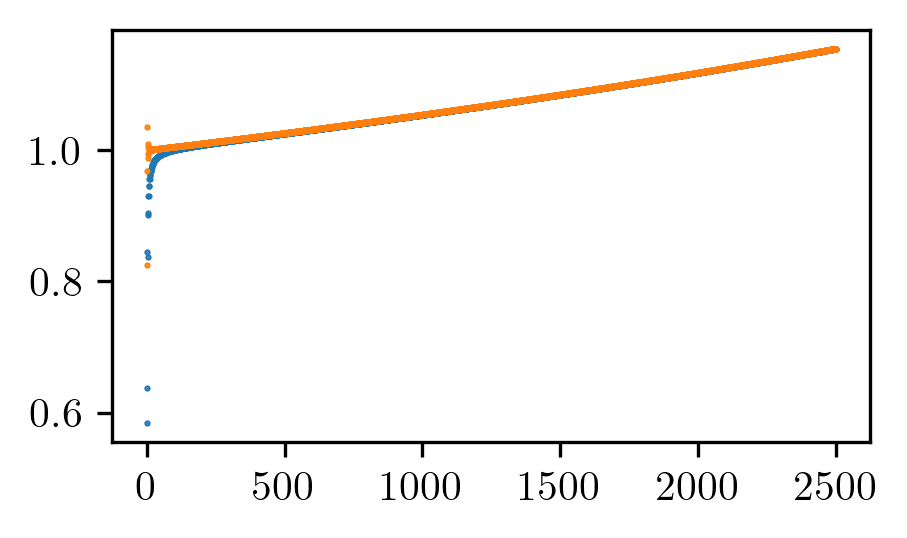

$g_{-1}$
1.071761233300219
1.0700604442938113
1.071761233300219


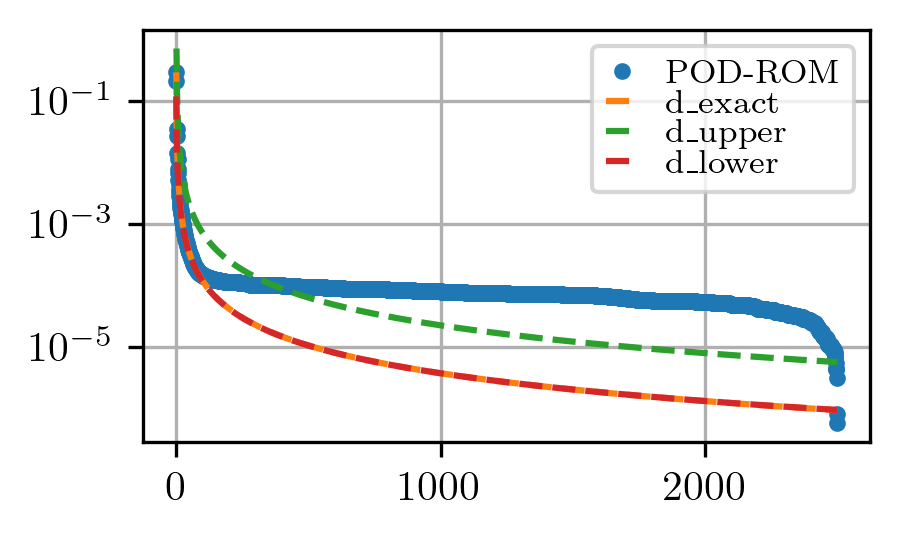

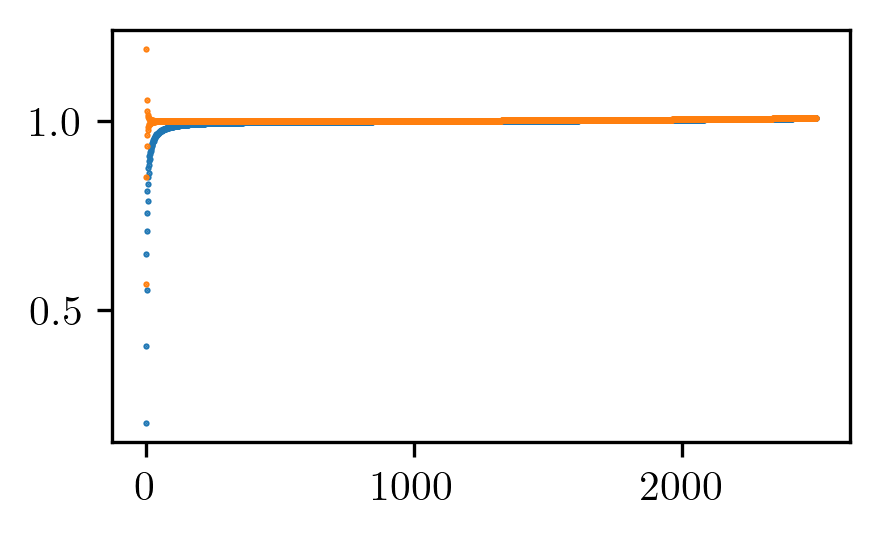

$g_0$
6.01371169397309
0.9973069735860807
1.0017845162350154


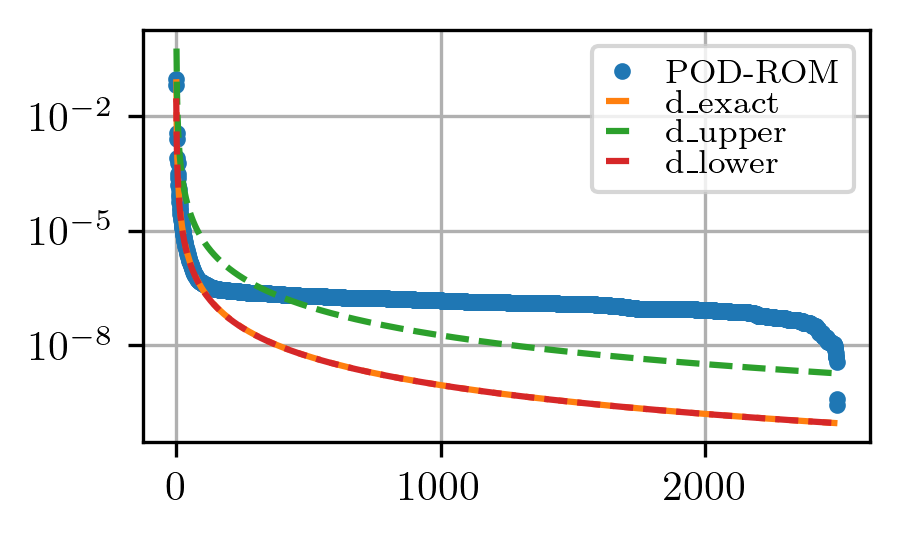

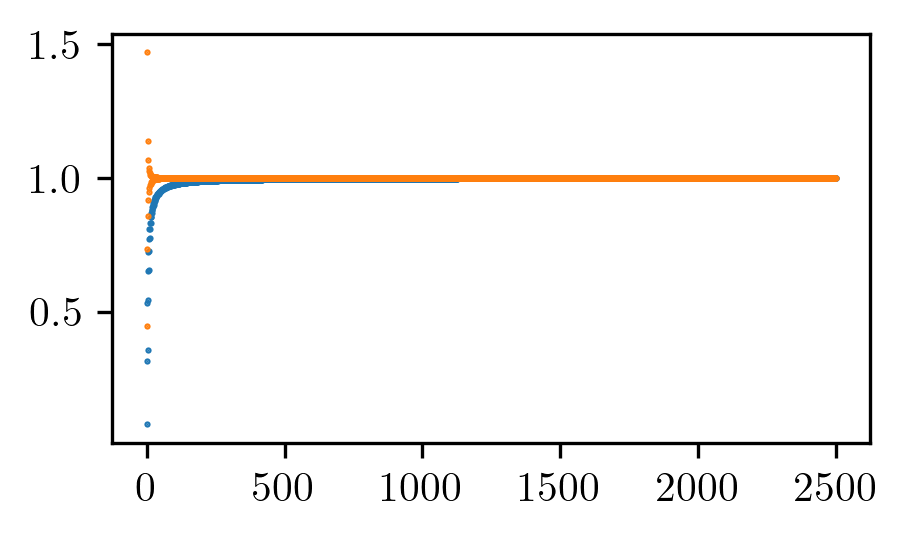

$g_1$
20.028986845454998
0.9927898638139607
0.9998858678764453


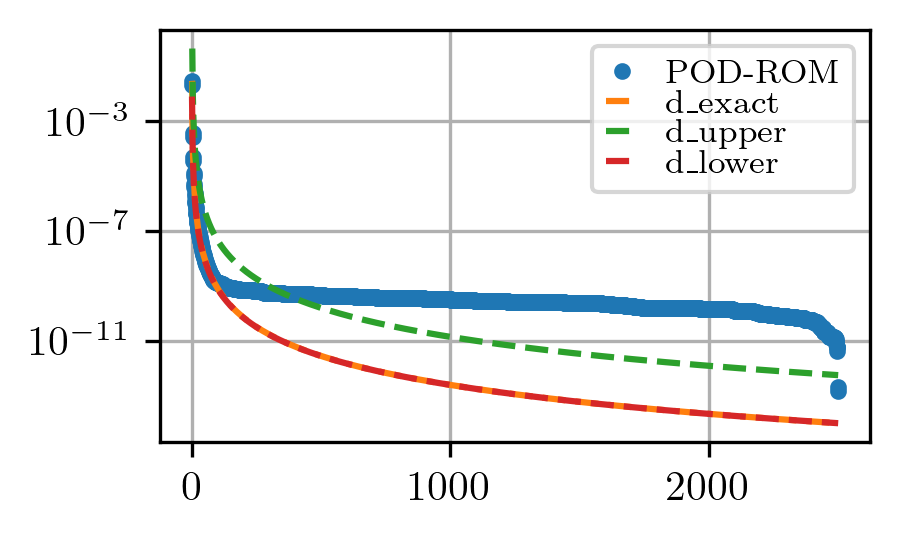

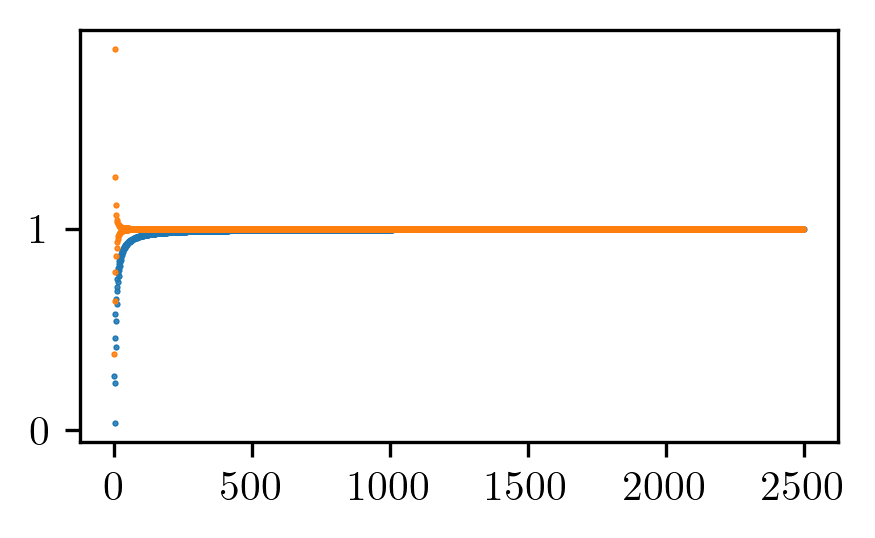

$g_2$
56.129852934295315
0.990249234118491
0.9998983101240552


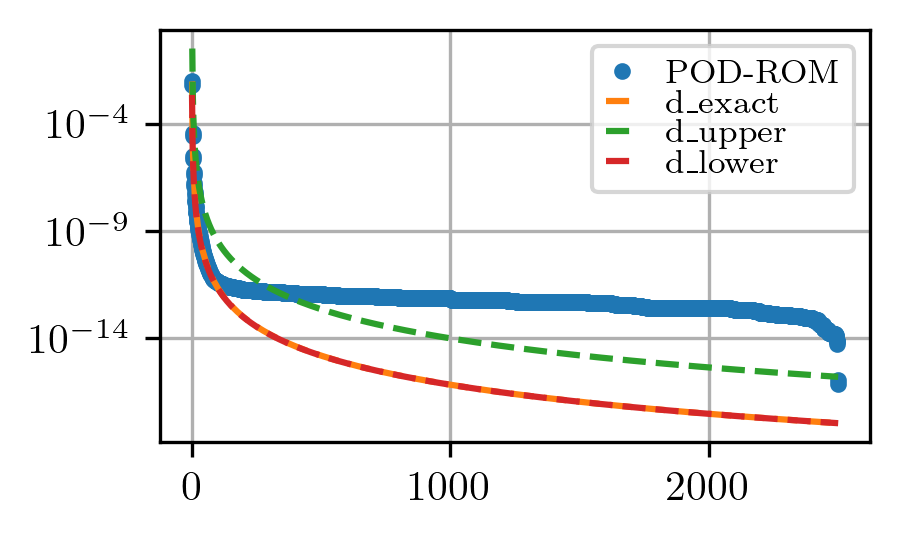

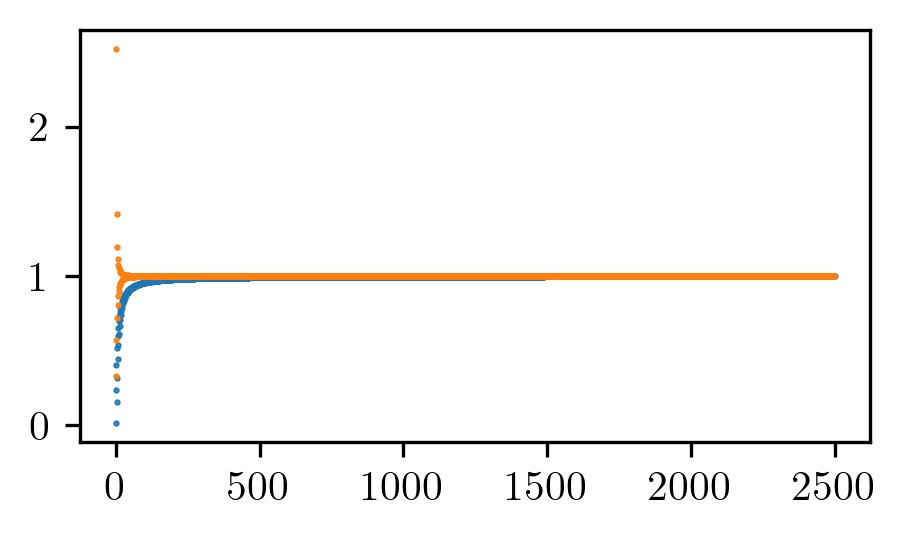

$g_3$
144.49821183276336
0.9878997332347162
1.000106521114419


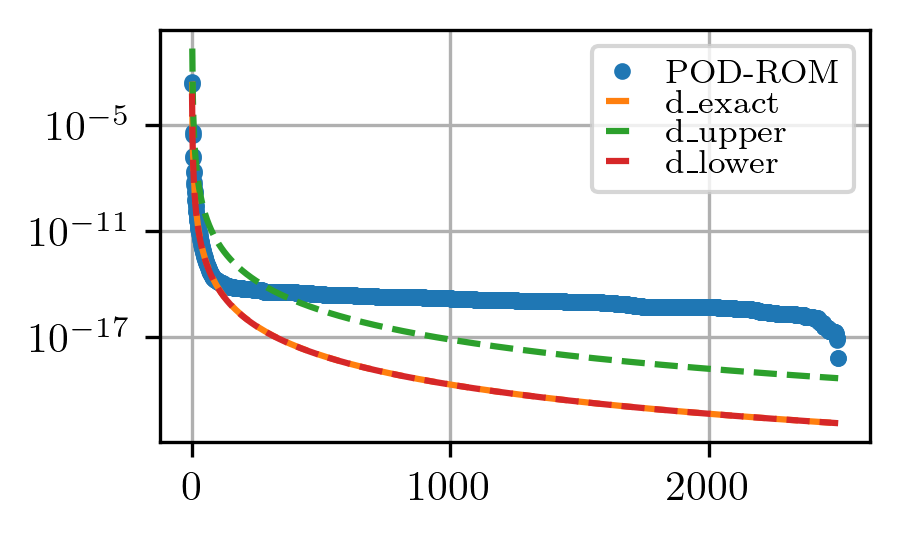

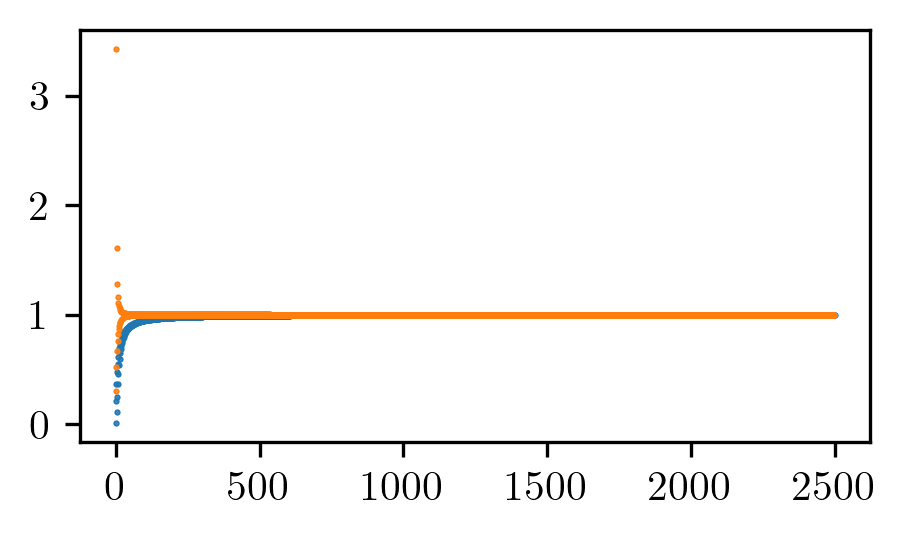

$g_4$
353.6720250886473
0.9856435441879665
1.0004736728260542


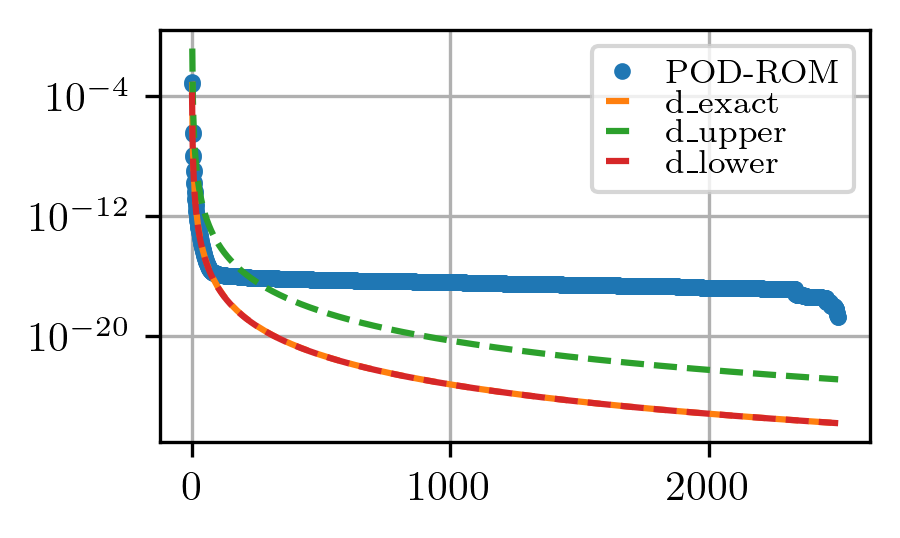

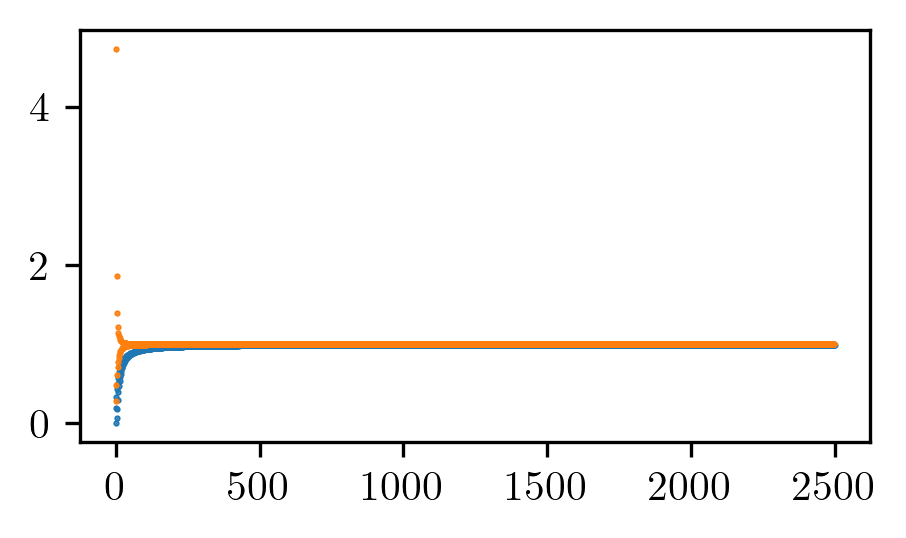

$g_5$
844.1623810845813
0.9834605803869222
1.0010472626435745


In [17]:
Ninf = np.arange(1, 10000)
N = np.arange(r+1)
for j, u_k in enumerate(initc):
    k = j-1
    y = u_k.q(np.linspace(-1, 1, 1000))
    f_L2 = L2(y, k+1)
    d_exact = np.cumsum((4*(1/((2*np.floor((Ninf+1)/2)-1)*np.pi))**(2*k+4))[::-1])[::-1][N]**.5
    d_upper = f_L2 * 2*(2*k+3)**.5 / np.pi**(k+2) * N**(-(k+1.5)) # Theorem 6.2 upper bound
    d_lower = 2/(2*k+3)**.5 / np.pi**(k+2) * (N+1)**(-(k+1.5)) # Theorem 6.2 lower bound

    fig, ax = plt.subplots()
    #[svd_basis, trig_basis_odd, fourier_basis]
    if VALIDATE:
        ax.plot(results[0, 1, j, :], "-", label=svd_basis.name)
        ax.plot(results[0, 2, j, :], "--", label=fourier_basis.name)
        ax.plot(results[0, 0, j, :], "o", label=trig_basis_odd.name)
    ax.plot(results[0, 0, j, :], ".", label="POD-ROM")
    ax.plot(d_exact, "--", label="d_exact")
    ax.plot(d_upper, "--", label="d_upper")
    ax.plot(d_lower, "--", label="d_lower")
    ax.set_yscale('log')
    plt.legend(prop={'size': 8})
    plt.grid()
    plt.show()

    fig, ax = plt.subplots()
#    plt.plot(d_upper/d_exact, ".")
    plt.plot(d_lower/d_exact, ".", ms=1)
    plt.plot(d_lower[:-1]/d_exact[1:], ".", ms=1)
    plt.show()
    print(u_k.name)
    print((d_upper/d_exact)[1:].mean())
    print((d_lower/d_exact).mean())
    print((d_lower[:-1]/d_exact[1:]).mean())
